<div style="border:solid green 2px; padding: 20px">
<b>Нурлан, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Критическая ошибка:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Хорошо, но можно и лучше:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Все отлично:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться в концепции / деталях работы. 

</div>

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
real_estate = pd.read_csv(r'/datasets/real_estate_data.csv', sep='\t')
real_estate.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Очень много пропущенных значений в половине столбцов (от ~1500 до ~21000). Некоторые столбцы требуют смены формата, например с float64 на int64, или с object на boolean.

## Предобработка данных

In [4]:
real_estate['balcony'] = real_estate['balcony'].fillna(0)

real_estate.loc[real_estate['floor'] > 1, 'is_apartment'] = real_estate.loc[real_estate['floor'] > 1, 'is_apartment'].fillna(True)
real_estate.loc[real_estate['floor'] <= 1, 'is_apartment'] = real_estate.loc[real_estate['floor'] <= 1, 'is_apartment'].fillna(False)

In [5]:
print(real_estate.loc[real_estate['living_area'].isna(), 'rooms'].min(), real_estate.loc[real_estate['living_area'].isna(), 'rooms'].max())
print(real_estate.loc[real_estate['kitchen_area'].isna(), 'rooms'].min(), real_estate.loc[real_estate['kitchen_area'].isna(), 'rooms'].max())

0 9
0 9


In [6]:
real_estate['floors_total'] = real_estate['floors_total'].fillna(real_estate['floors_total'].median())

real_estate.loc[real_estate['rooms'] == 0, 'living_area'] = real_estate.loc[real_estate['rooms'] == 0, 'living_area'].fillna(real_estate.loc[real_estate['rooms'] == 0, 'living_area'].median())
real_estate.loc[real_estate['rooms'] == 1, 'living_area'] = real_estate.loc[real_estate['rooms'] == 1, 'living_area'].fillna(real_estate.loc[real_estate['rooms'] == 1, 'living_area'].median())
real_estate.loc[real_estate['rooms'] == 2, 'living_area'] = real_estate.loc[real_estate['rooms'] == 2, 'living_area'].fillna(real_estate.loc[real_estate['rooms'] == 2, 'living_area'].median())
real_estate.loc[real_estate['rooms'] == 3, 'living_area'] = real_estate.loc[real_estate['rooms'] == 3, 'living_area'].fillna(real_estate.loc[real_estate['rooms'] == 3, 'living_area'].median())
real_estate.loc[real_estate['rooms'] == 4, 'living_area'] = real_estate.loc[real_estate['rooms'] == 4, 'living_area'].fillna(real_estate.loc[real_estate['rooms'] == 4, 'living_area'].median())
real_estate.loc[real_estate['rooms'] == 5, 'living_area'] = real_estate.loc[real_estate['rooms'] == 5, 'living_area'].fillna(real_estate.loc[real_estate['rooms'] == 5, 'living_area'].median())
real_estate.loc[real_estate['rooms'] == 6, 'living_area'] = real_estate.loc[real_estate['rooms'] == 6, 'living_area'].fillna(real_estate.loc[real_estate['rooms'] == 6, 'living_area'].median())
real_estate.loc[real_estate['rooms'] == 7, 'living_area'] = real_estate.loc[real_estate['rooms'] == 7, 'living_area'].fillna(real_estate.loc[real_estate['rooms'] == 7, 'living_area'].median())
real_estate.loc[real_estate['rooms'] == 8, 'living_area'] = real_estate.loc[real_estate['rooms'] == 8, 'living_area'].fillna(real_estate.loc[real_estate['rooms'] == 8, 'living_area'].median())
real_estate.loc[real_estate['rooms'] == 9, 'living_area'] = real_estate.loc[real_estate['rooms'] == 9, 'living_area'].fillna(real_estate.loc[real_estate['rooms'] == 9, 'living_area'].median())

real_estate.loc[real_estate['rooms'] == 0, 'kitchen_area'] = real_estate.loc[real_estate['rooms'] == 0, 'kitchen_area'].fillna(0)
real_estate.loc[real_estate['rooms'] == 1, 'kitchen_area'] = real_estate.loc[real_estate['rooms'] == 1, 'kitchen_area'].fillna(real_estate.loc[real_estate['rooms'] == 1, 'kitchen_area'].median())
real_estate.loc[real_estate['rooms'] == 2, 'kitchen_area'] = real_estate.loc[real_estate['rooms'] == 2, 'kitchen_area'].fillna(real_estate.loc[real_estate['rooms'] == 2, 'kitchen_area'].median())
real_estate.loc[real_estate['rooms'] == 3, 'kitchen_area'] = real_estate.loc[real_estate['rooms'] == 3, 'kitchen_area'].fillna(real_estate.loc[real_estate['rooms'] == 3, 'kitchen_area'].median())
real_estate.loc[real_estate['rooms'] == 4, 'kitchen_area'] = real_estate.loc[real_estate['rooms'] == 4, 'kitchen_area'].fillna(real_estate.loc[real_estate['rooms'] == 4, 'kitchen_area'].median())
real_estate.loc[real_estate['rooms'] == 5, 'kitchen_area'] = real_estate.loc[real_estate['rooms'] == 5, 'kitchen_area'].fillna(real_estate.loc[real_estate['rooms'] == 5, 'kitchen_area'].median())
real_estate.loc[real_estate['rooms'] == 6, 'kitchen_area'] = real_estate.loc[real_estate['rooms'] == 6, 'kitchen_area'].fillna(real_estate.loc[real_estate['rooms'] == 6, 'kitchen_area'].median())
real_estate.loc[real_estate['rooms'] == 7, 'kitchen_area'] = real_estate.loc[real_estate['rooms'] == 7, 'kitchen_area'].fillna(real_estate.loc[real_estate['rooms'] == 7, 'kitchen_area'].median())
real_estate.loc[real_estate['rooms'] == 8, 'kitchen_area'] = real_estate.loc[real_estate['rooms'] == 8, 'kitchen_area'].fillna(real_estate.loc[real_estate['rooms'] == 8, 'kitchen_area'].median())
real_estate.loc[real_estate['rooms'] == 9, 'kitchen_area'] = real_estate.loc[real_estate['rooms'] == 9, 'kitchen_area'].fillna(real_estate.loc[real_estate['rooms'] == 9, 'kitchen_area'].median())

real_estate['days_exposition'] = real_estate['days_exposition'].fillna(real_estate['days_exposition'].median())

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кажется здесь можно было бы использовать цикл `for`, чтобы автоматизировать замену пропусков.
</div>

In [7]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Пропуски в столбце balcony были запонены нулем из ходя из того, что скорее всего балкона в данных объектах недвижимости нет. Пропуски в столбце is_apartment были заполнены True с условием, что они находятся выше первого этажа, так как на первых этажах также могут находиться коммерческие нежилые помещения, и заполнены False в обратном случае. Столбцы floors_total и days_exposition были заполнены медианными значениями, так как доли пропусков в этих столбцах составляли менее 10%. Пропуски в столбцах living_area и kitchen_area были заполнены мединанными значениями из ходя из того, сколько комнат есть в данных объектах недвижимости. ###Остальные пропущенные значения были заполнены пустым текстовым значением, так как нет логического пути определения их точного значения.

In [8]:
real_estate['last_price'] = real_estate['last_price'].astype(int)
real_estate['first_day_exposition'] = pd.to_datetime(real_estate['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
real_estate['floors_total'] = real_estate['floors_total'].astype(int)
real_estate['balcony'] = real_estate['balcony'].astype(int)
real_estate['days_exposition'] = real_estate['days_exposition'].astype(int)
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Столбцы last_price, days_exposition, balcony и floors_total нуждались в смене типа данных, так как представляют собой числовой эквивалент чем дробный, как например living_area или kitchen_area, где даже цифры после запятой имеют значение. Формат данных из столбца first_day_exposition требовал корректировки, так как подразумевал собой формат datetime но был сохранен как string.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В том числе метод `fillna` и `astype` можно применять к нескольким столбцам одновременно.
    
Если столбцов более 2–ух, то рекомендую применять цикл `for`.
    
Пример: 
    
`df.astype({ "col1": "float64", "col2": "int64"})`
    
</div>

```python

columns = [col1, col2, col3]

for i in columns:
    df[i] = df[i].fillna(0)

```

## Расчёты и добавление результатов в таблицу

In [9]:
real_estate['sq_meter_price'] = real_estate['last_price'] / real_estate['total_area']

real_estate['first_day_exposition(weekday)'] = real_estate['first_day_exposition'].dt.day_name()
real_estate['first_day_exposition(month)'] = real_estate['first_day_exposition'].dt.month
real_estate['first_day_exposition(year)'] = real_estate['first_day_exposition'].dt.year

def categorize_floor(row):
    if row['floor'] == row['floors_total']:
        return 'Последний'
    elif row['floor'] == 1:
        return 'Первый'
    else:
        return 'Другой'
real_estate['floor_category'] = real_estate.apply(categorize_floor, axis=1)

real_estate['total_living_area_prop'] = real_estate['total_area'] / real_estate['living_area']
real_estate['total_kitchen_area_prop'] = real_estate['total_area'] / real_estate['kitchen_area']

In [10]:
real_estate.tail(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,first_day_exposition(weekday),first_day_exposition(month),first_day_exposition(year),floor_category,total_living_area_prop,total_kitchen_area_prop
23694,9,9700000,133.81,2017-03-21,3,3.7,5,73.3,3,True,...,3.0,381.0,95,72490.845228,Tuesday,3,2017,Другой,1.825512,9.675343
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.0,4,True,...,NaN,NaN,45,52542.372881,Monday,1,2018,Другой,1.552632,6.941176
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.7,1,False,...,NaN,NaN,95,44091.710758,Sunday,2,2018,Первый,1.909091,6.443182
23697,13,11475000,76.75,2017-03-28,2,3.0,17,30.5,12,True,...,3.0,196.0,602,149511.400651,Tuesday,3,2017,Другой,2.516393,3.293991
23698,4,1350000,32.30,2017-07-21,1,2.5,5,12.3,1,False,...,NaN,NaN,95,41795.665635,Friday,7,2017,Первый,2.626016,3.588889


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Мы достаточно детально обработали наши данные и добавили все необходимые значения в нашу выборку. Давай теперь проведём анализ.
    
</div>

## Исследовательский анализ данных

array([[<AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'last_price'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

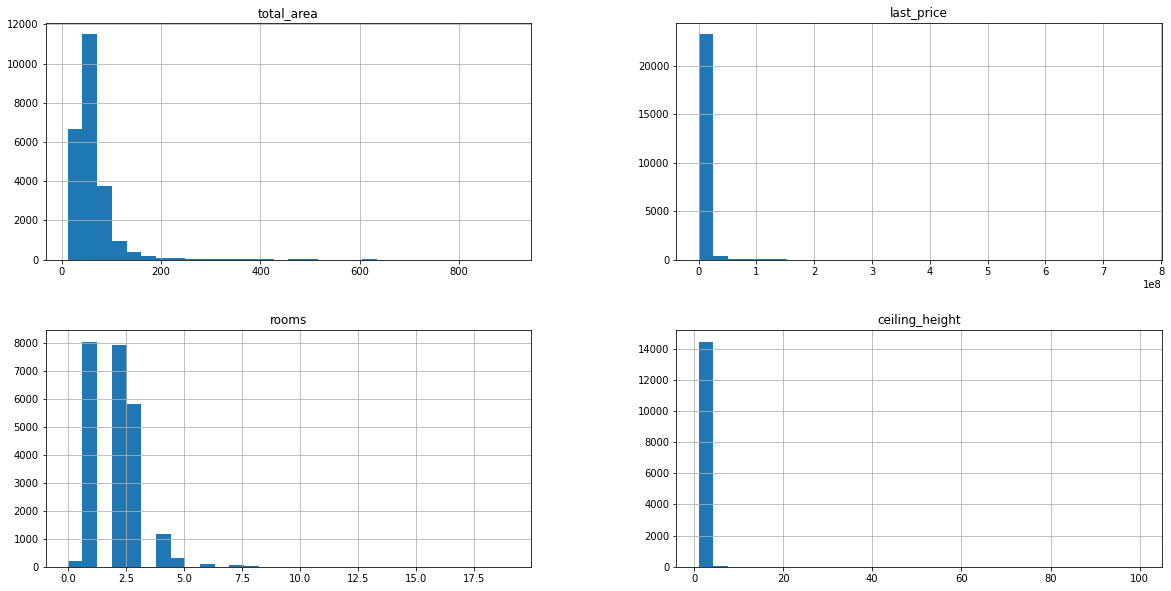

In [11]:
need_hist = real_estate[['total_area', 'last_price', 'rooms', 'ceiling_height']]
need_hist.hist(bins=30, figsize=(20,10))

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Очень классный и быстрый способ визуализировать несколько графиков сразу 👍
    
</div>

169.36022616988058
95.0
1
1580


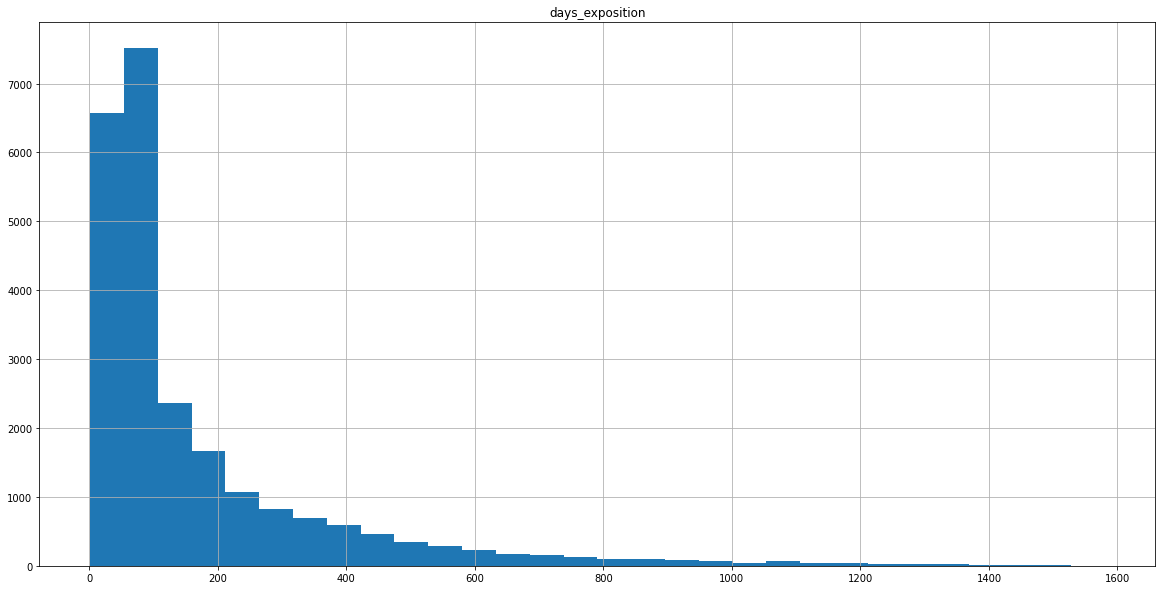

In [12]:
real_estate.hist(column='days_exposition' ,bins=30, figsize=(20,10))
print(real_estate['days_exposition'].mean())
print(real_estate['days_exposition'].median())
print(real_estate['days_exposition'].min())
print(real_estate['days_exposition'].max())

Продажа обычно занимает около 80-120 дней, что равно 3-4 месяцам. Если продажа совершилась до 60 дней, то можно назвать ее быстрой. Если же она заняла более 800 дней, то долгой. 

23535


array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

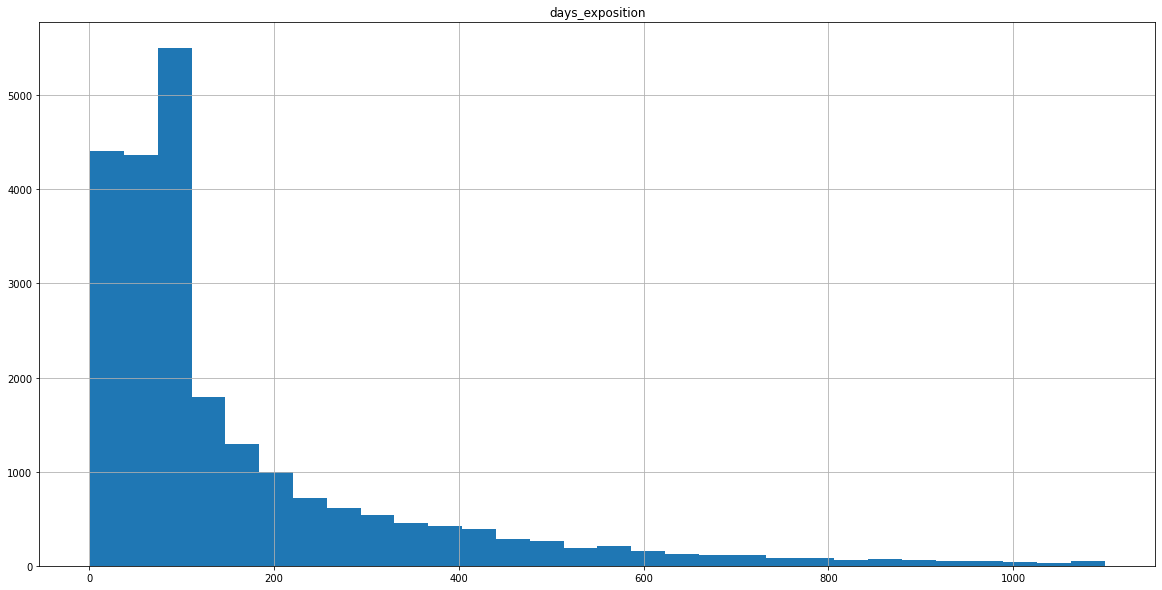

In [13]:
real_estate = real_estate.query('days_exposition < 1100')
print(len(real_estate))
real_estate.hist(column='days_exposition' ,bins=30, figsize=(20,10))

В общем целом, тренд остался на месте. За исключением того, что пиковая область в районе 100 дней упала с 7500 кейсов до ~5600.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати для того чтобы подписать график мы можем использовать метод `plt.title()` и в конце кода применить `plt.show()`
</div>

<AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>

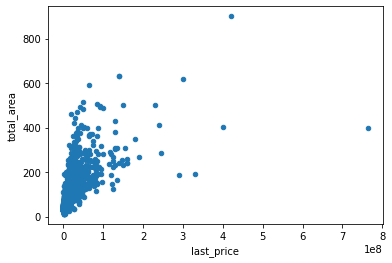

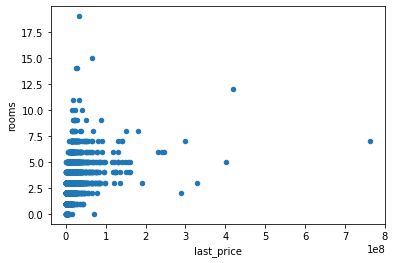

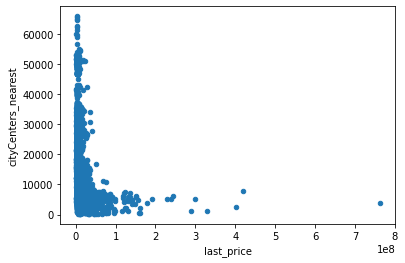

In [14]:
real_estate.plot(x='last_price', y='total_area', kind='scatter')
real_estate.plot(x='last_price', y='rooms', kind='scatter')
real_estate.plot(x='last_price', y='cityCenters_nearest', kind='scatter')

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    
Очень важно строить график корреляции между переменными, ведь может произойти такая ситуация, что расчет у нас очень сильный а на графике абсолютно другая картина.
    
---

В том числе можно было построить матрицу корреляции между нужными нам переменными.
    
И визуализировать её с помощью метода `heatmap` из библиотеки `seaborn`.
    
</div>

<AxesSubplot:xlabel='floor_category'>

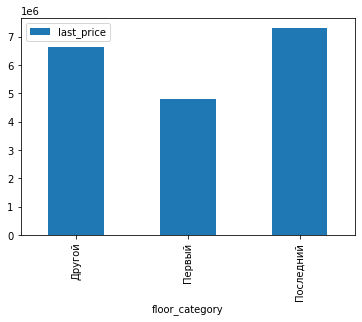

In [28]:
real_estate.pivot_table(index='floor_category', values='last_price', aggfunc='mean').plot(kind='bar')

<AxesSubplot:xlabel='first_day_exposition(year)'>

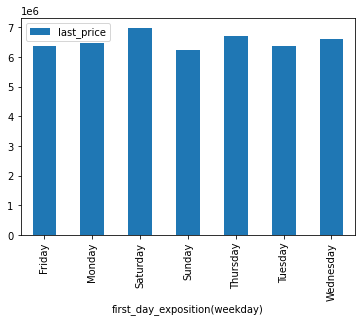

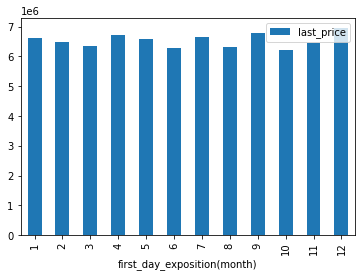

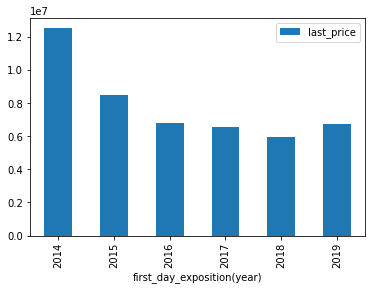

In [32]:
real_estate.pivot_table(index='first_day_exposition(weekday)', values='last_price', aggfunc='mean').plot(kind='bar')
real_estate.pivot_table(index='first_day_exposition(month)', values='last_price', aggfunc='mean').plot(kind='bar')
real_estate.pivot_table(index='first_day_exposition(year)', values='last_price', aggfunc='mean').plot(kind='bar')

<AxesSubplot:>

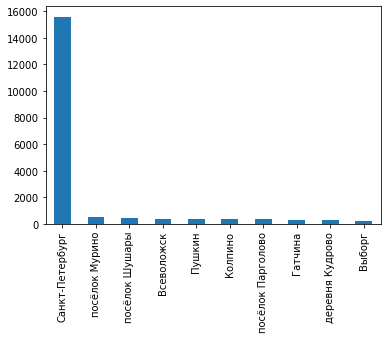

In [17]:
real_estate['locality_name'].value_counts(sort=True)[:10].plot(kind='bar')

In [18]:
spb_region_prices = [real_estate.loc[real_estate['locality_name'] == 'Санкт-Петербург', 'last_price'].sum() / real_estate.loc[real_estate['locality_name'] == 'Санкт-Петербург', 'total_area'].sum(),
real_estate.loc[real_estate['locality_name'] == 'посёлок Мурино', 'last_price'].sum() / real_estate.loc[real_estate['locality_name'] == 'посёлок Мурино', 'total_area'].sum(),
real_estate.loc[real_estate['locality_name'] == 'посёлок Шушары', 'last_price'].sum() / real_estate.loc[real_estate['locality_name'] == 'посёлок Шушары', 'total_area'].sum(),
real_estate.loc[real_estate['locality_name'] == 'Всеволожск', 'last_price'].sum() / real_estate.loc[real_estate['locality_name'] == 'Всеволожск', 'total_area'].sum(),
real_estate.loc[real_estate['locality_name'] == 'Пушкин', 'last_price'].sum() / real_estate.loc[real_estate['locality_name'] == 'Пушкин', 'total_area'].sum(),
real_estate.loc[real_estate['locality_name'] == 'Колпино', 'last_price'].sum() / real_estate.loc[real_estate['locality_name'] == 'Колпино', 'total_area'].sum(),
real_estate.loc[real_estate['locality_name'] == 'посёлок Парголово', 'last_price'].sum() / real_estate.loc[real_estate['locality_name'] == 'посёлок Парголово', 'total_area'].sum(),
real_estate.loc[real_estate['locality_name'] == 'Гатчина', 'last_price'].sum() / real_estate.loc[real_estate['locality_name'] == 'Гатчина', 'total_area'].sum(),
real_estate.loc[real_estate['locality_name'] == 'деревня Кудрово', 'last_price'].sum() / real_estate.loc[real_estate['locality_name'] == 'деревня Кудрово', 'total_area'].sum(),
real_estate.loc[real_estate['locality_name'] == 'Выборг', 'last_price'].sum() / real_estate.loc[real_estate['locality_name'] == 'Выборг', 'total_area'].sum()]
print(spb_region_prices)
print(min(spb_region_prices))
print(max(spb_region_prices))

[124517.85576855589, 83295.67499036682, 76299.41353227031, 67649.4247903015, 105117.39829969451, 74439.19501757211, 87049.3054559884, 68475.38153442442, 90884.86470306081, 57898.142108696105]
57898.142108696105
124517.85576855589


Наивысший показатель цены за квадратный метр как и ожидалось принадлежит Санкт-Петербургу, а самые низкая цена квадратного метра зафиксирована в Выборге.

/tmp/ipykernel_54/3407603847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_objects['cityCenters_nearest_km'] = spb_objects['cityCenters_nearest'] / 1000
/tmp/ipykernel_54/3407603847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_objects['sq_meter_price_km'] = spb_objects['sq_meter_price'] / spb_objects['cityCenters_nearest_km']


<AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='sq_meter_price_km'>

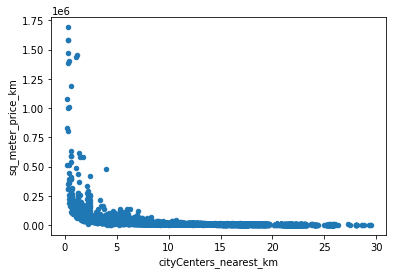

In [19]:
spb_objects = real_estate.query('locality_name == "Санкт-Петербург"')
spb_objects['cityCenters_nearest_km'] = spb_objects['cityCenters_nearest'] / 1000
spb_objects['sq_meter_price_km'] = spb_objects['sq_meter_price'] / spb_objects['cityCenters_nearest_km']
spb_objects.plot(kind='scatter', x='cityCenters_nearest_km', y='sq_meter_price_km')

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати можно отключить предупреждения с помощью следующего способа ниже.
    
`import warnings` 
    
`warnings.simplefilter('ignore')` 
    
</div>

В районе 3 км график становится горизонтальным, это и есть граница центра города.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Ориентировочно это 8 – 10 км, потому что дальше идёт в том числе спад и длительная стагнация стоимости.
    
</div>

array([[<AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'last_price'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

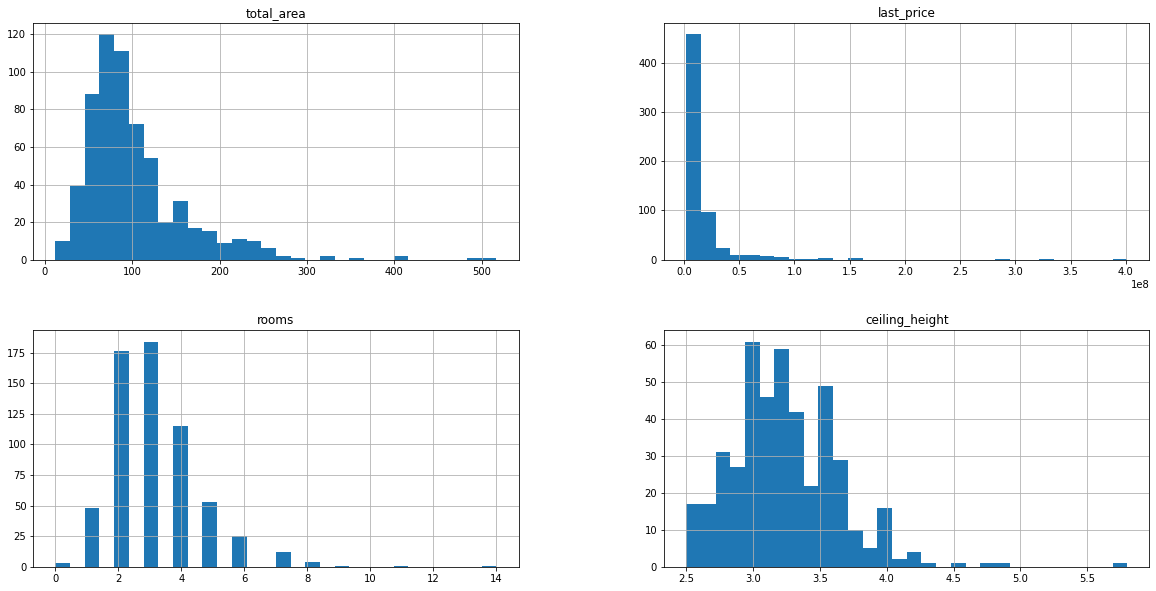

In [20]:
spb_objects_center = spb_objects.query('cityCenters_nearest_km <= 3.0')
need_hist2 = spb_objects_center[['total_area', 'last_price', 'rooms', 'ceiling_height']]
need_hist2.hist(bins=30, figsize=(20,10))

Гистограммы стали более содержательными во всех четырех атрибутах данных. Особенно заметна ясность в rooms и ceiling_height. Более похожей по тренду на гистограмму со всеми данными осталась та что относится к last_price. 

<AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>

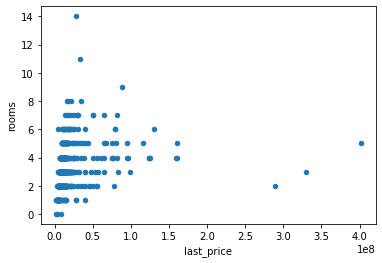

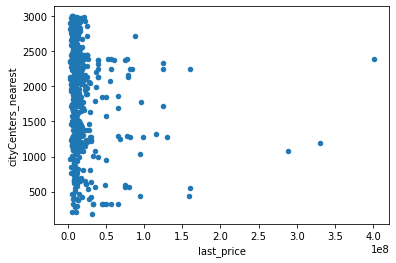

In [21]:
spb_objects_center.plot(x='last_price', y='rooms', kind='scatter')
spb_objects_center.plot(x='last_price', y='cityCenters_nearest', kind='scatter')

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Обрати внимание, что наши действия повторяются с точки зрения построения графиков.
    
Это говорит о том, что мы можем создать функцию, которая будет выполнять все действия за нас.
    
Тем самым мы сможем оптимизировать свой код и проект целиком.
    
</div>

Гистограмма отношения числа комнат к последней цене более менее осталась верна тренду всех данных, когда как гистограмма отношения к расстоянию от центра избавилась от "хвоста" и это связано с тем что, мы определили точку вхождения в центр (3 км) и отсекли остальные данные. 

<AxesSubplot:xlabel='floor_category'>

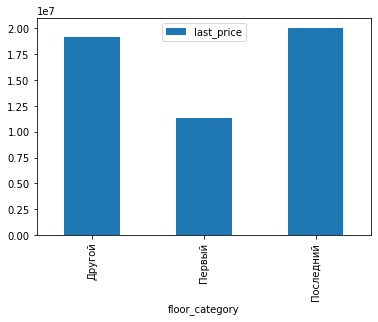

In [27]:
spb_objects_center.pivot_table(index='floor_category', values='last_price', aggfunc='mean').plot(kind='bar')

В целом тренд не изменился, только масштаб стал меньше.

<AxesSubplot:xlabel='first_day_exposition(year)'>

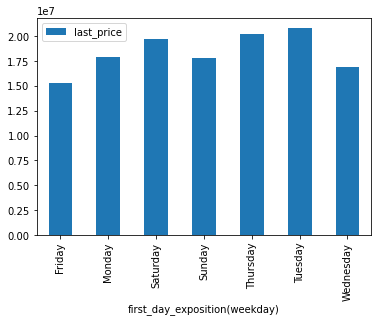

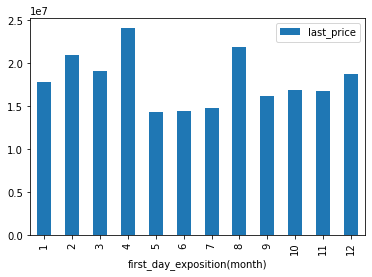

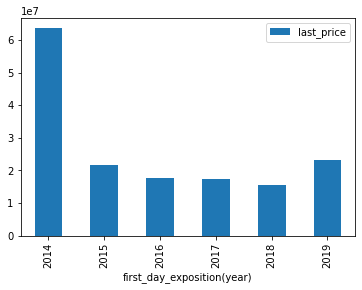

In [31]:
spb_objects_center.pivot_table(index='first_day_exposition(weekday)', values='last_price', aggfunc='mean').plot(kind='bar')
spb_objects_center.pivot_table(index='first_day_exposition(month)', values='last_price', aggfunc='mean').plot(kind='bar')
spb_objects_center.pivot_table(index='first_day_exposition(year)', values='last_price', aggfunc='mean').plot(kind='bar')

Самым популярным днем для размещения объявления с наивызшей ценой в разрезе региона является Суббота (далее - Четверг), а в разрезе СПб - Вторник (далее - Четверг и Суббота). В данных по всему региону месяцами с пиковой ценой были Январь, Апрель, Июль, Сентябрь, и Декабрь. Когда как в данных по СПб это Февраль, Апрель, и Август, а месяца с рекордно низкой ценой являются Май, Июнь, и Июль, которые не сильно разнятся от пиковых значений во всех данных.  Тренд цены в зависимости от года похож на тренд общих данных - наивысшая цена зафиксирована в 2014, самая же низкая в 2018. По остальным годам имеются незначительные различия.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати можно было бы сравнить центр и весь город в целом, для наглядности наших расчетов.
    
</div>

## Общий вывод

Вывод таков, что данные не относящиеся к центру СПб (включая агломерации) создают шум в данных, и проводить аналитику с такими данными для СПб не совсем правильно. Исключение данного шума было верным значением. По итогу мы имеет то, что самыми популярными для продажи квартирами являются 2-х и 3-х комнатные, высота потолков 3-3.5 м, цена до 20 млн рублей, площадь 60-90 кв.м. Последний этаж является самым дорогим (возможно это пентхаусы так влияют на среднюю цену), число комнат не сильно влияет на цену недвижимости (возможно из-за того, что в данных есть многокомнатные одноэтажные дома), расположение от центра сильно влияет на цену недвижимости. Дороже всего квартиру можно было продавать в 2014 году по Четвергам Апреля.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
    
    
    
**[общий комментарий]** Ячейки **markdown** в том числе мы можем использовать как дополнительный способ стилизации нашего проекта. Оставил ниже ссылку, с примерами стилизации.

https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    

Возвращаю проект обратно, чтобы убедиться что все мои комментарии понятны.
    
Если вдруг у тебя возникнут какие-то вопросы, то я с радостью отвечу на них 😊
    
</div>

<div class="alert alert-info"> 
<b>Комментарий студента: </b>

Спасибо, вопросов нет. Старался выполнить проект без вопросов 😊

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Рад, что в целом все понятно. Тогда предлагаю двигаться дальше.
    
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊
    
    
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод `info()`)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  посчитано и добавлено в таблицу: цена квадратного метра
- [ ]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [ ]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [ ]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [ ]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [ ]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [ ]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [ ]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [ ]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [ ]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [ ]  в каждом этапе есть выводы
- [ ]  есть общий вывод